In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from random import randint
import cv2 
import numpy as np
import imutils

In [157]:
def negative(path_to_image):
    image = plt.imread(path_to_image)
    negative_image = 1 - image
    return negative_image

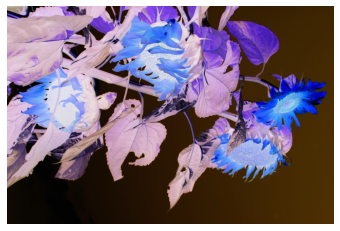

In [158]:
negative_sunflowers = negative('sunflowers.JPG')
plt.imshow(negative_sunflowers)
plt.axis('off')
plt.show()

In [165]:
def positive(path_to_image):
    image = plt.imread(path_to_image)
    positive_image = image[:, :, 2]
    return positive_image

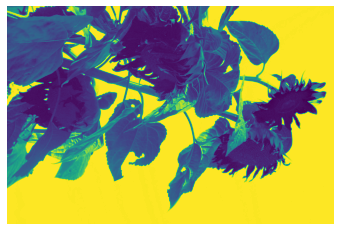

In [166]:
positive_sunflowers = positive('sunflowers.JPG')
plt.imshow(positive_sunflowers)
plt.axis('off')
plt.show()

In [167]:
def noise(path_to_image, noise_factor):
    img = Image.open(path_to_image)
    noise_img = Image.new('RGB', img.size)
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            rand = randint(-noise_factor, noise_factor)
            r, g, b = img.getpixel((x, y))

            red = int(r + rand)
            red = min(255, max(0, red))

            green = int(g + rand)
            green = min(255, max(0, green))

            blue = int(b + rand)
            blue = min(255, max(0, blue))

            noise_img.putpixel((x, y), (red, green, blue))
    return noise_img

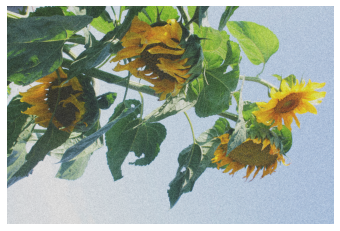

In [169]:
noise_sunflowers = noise('sunflowers.JPG', 150)
plt.imshow(noise_sunflowers)
plt.axis('off')
plt.show()

In [170]:
def sepia(path_to_image):
    img = Image.open(path_to_image)
    sepia_img = Image.new('RGB', img.size)
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            r, g, b = img.getpixel((x, y))
            red = int(r * 0.393 + g * 0.769 + b * 0.189)
            green = int(r * 0.349 + g * 0.686 + b * 0.168)
            blue = int(r * 0.272 + g * 0.534 + b * 0.131)
            sepia_img.putpixel((x, y), (red, green, blue))
    return sepia_img

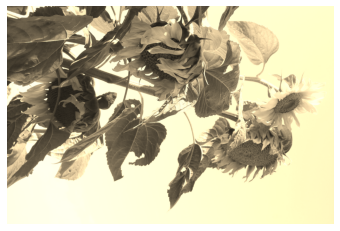

In [171]:
sepia_sunflowers = sepia('sunflowers.JPG')
plt.imshow(sepia_sunflowers)
plt.axis('off')
plt.show()

In [172]:
def bright(path_to_image, brightness):
    img = Image.open(path_to_image)
    bright_img = Image.new('RGB', img.size)
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            r, g, b = img.getpixel((x, y))

            red = int(r * brightness)
            red = min(255, max(0, red))

            green = int(g * brightness)
            green = min(255, max(0, green))

            blue = int(b * brightness)
            blue = min(255, max(0, blue))

            bright_img.putpixel((x, y), (red, green, blue))
    return bright_img

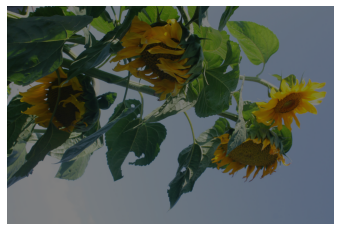

In [173]:
bright_sunflowers = bright('sunflowers.JPG', 0.5)
plt.imshow(bright_sunflowers)
plt.axis('off')
plt.show()

In [ ]:
# Load an image
img = cv2.imread('geom-figures.jpg')
 
# Resize an image
if img.shape[1] > 600:
    img = imutils.resize(img, width=600)
clone = img.copy()
 
# Convert to grayscale
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
 
# Threshold grayscaled image to get binary image
ret,gray_threshed = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
 
# Smooth an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)
 
# Find edges
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
 
# Find contours
contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (50000 > area > 10000) ):
        contour_list.append(contour)
 
# Draw contours
cv2.drawContours(clone, contour_list, -1, (255,0,0), 2)
 
# Displaying the results
cv2.imshow('Objects Detected',clone)
cv2.waitKey(0)